# **Exploratory Data Analysis Lab**




you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [ ]:
import pandas as pd

Load the dataset into a dataframe.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Df = pd.read_csv('/content/drive/MyDrive/Business Analyst Projects/IBM - stack over flow survey project/week2(data wrangling- cleaning)/M2 survey file after wrangling.csv')

In [ ]:
Df.describe()


,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age,NormalizedAnnualCompensation
count,11398.000000,1.058900e+04,1.058200e+04,11276.000000,8972.000000,11111.000000,1.058900e+04
mean,12490.392437,7.570477e+05,1.315967e+05,42.064606,4.781071,30.778895,6.133295e+06
std,7235.461999,9.705598e+06,2.947865e+05,24.672741,4.567060,7.393686,9.838157e+07
min,4.000000,0.000000e+00,0.000000e+00,3.000000,0.000000,16.000000,0.000000e+00
25%,6264.250000,2.500000e+04,2.686800e+04,40.000000,2.000000,25.000000,5.200000e+04
50%,12484.000000,6.500000e+04,5.774500e+04,40.000000,4.000000,29.000000,1.000000e+05
75%,18784.750000,1.200000e+05,1.000000e+05,43.000000,5.000000,35.000000,3.600000e+05
max,25142.000000,7.000000e+08,2.000000e+06,1012.000000,99.000000,99.000000,8.400000e+09


## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<Axes: ylabel='Density'>

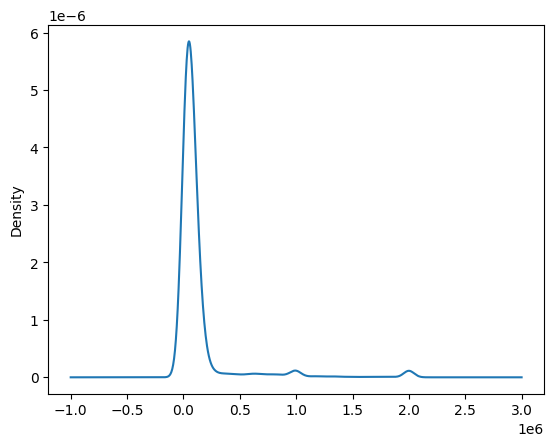

In [ ]:

Df['ConvertedComp'].plot(kind = 'kde')


Plot the histogram for the column `ConvertedComp`.


<Axes: ylabel='Frequency'>

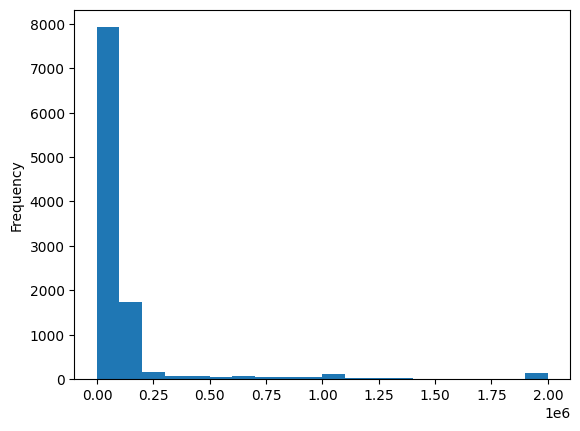

In [ ]:
# your code goes here
Df['ConvertedComp'].plot(kind = 'hist', bins  = 20)


What is the median of the column `ConvertedComp`?


In [ ]:
# your code goes here
Df['ConvertedComp'].median()

57745.0

In [ ]:

# What is the median Age of survey respondents?
Df['Age'].median()

29.0

How many responders identified themselves only as a **Man**?


In [ ]:
# your code goes here
Df.where(Df['Gender'] == "Man")['Respondent'].count()

10480

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [ ]:
# your code goes here
Df.where(Df['Gender'] == 'Woman')['ConvertedComp'].median()


57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [ ]:
# your code goes here
Df['Age'].describe().loc[['min', '25%', '50%', '75%', 'max']]


min    16.0
25%    25.0
50%    29.0
75%    35.0
max    99.0
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<Axes: >

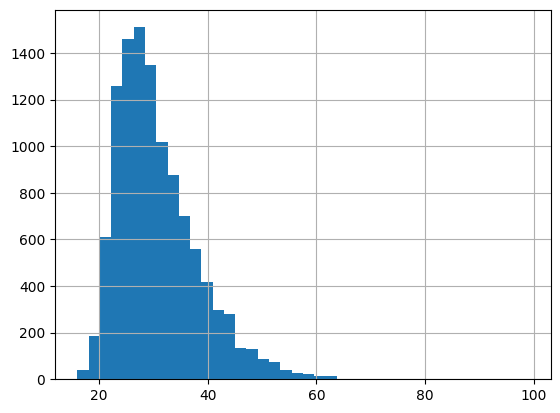

In [ ]:
# your code goes here
Df['Age'].hist( bins = 40)



### Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


min          0.0
25%      26868.0
50%      57745.0
75%     100000.0
max    2000000.0
Name: ConvertedComp, dtype: float64

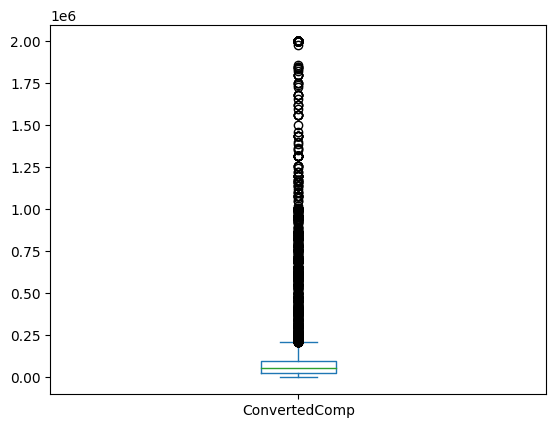

In [ ]:
# your code goes here
Df['ConvertedComp'].plot(kind= 'box')
Df['ConvertedComp'].describe().loc[['min', '25%', '50%', '75%', 'max']]


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [ ]:
# your code goes here
Q3 = Df['ConvertedComp'].describe().loc['75%']
Q1 = Df['ConvertedComp'].describe().loc['25%']
inter_Quartile = Q3- Q1
inter_Quartile


73132.0

Find out the upper and lower bounds.


In [ ]:
# your code goes here
# upper bound / Upper fence = Q3 + 1.5*inter_Quartile
upper_bound = Q3 + 1.5*inter_Quartile
upper_bound


# # lower bound / lower fence = Q1 - 1.5*inter_Quartile

lower_bound  = Q1 - 1.5*inter_Quartile
lower_bound

-82830.0

Identify how many outliers are there in the `ConvertedComp` column.


In [ ]:
# your code goes here
upper_outliers = (Df['ConvertedComp'] > upper_bound).sum()
lower_outliers = (Df['ConvertedComp'] < lower_bound).sum()
total_outliers = upper_outliers + lower_outliers
total_outliers

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [ ]:
Okay_list =Df.where(Df['ConvertedComp'] <= upper_bound)['ConvertedComp'] # i did not check for lower value as no outlier was there
Df.drop(columns ='ConvertedComp', inplace = True)
Df.insert(32, 'ConvertedComp', Okay_list ) # inserting a new column at place 33 position
Df['ConvertedComp']

Df.shape






(11398, 86)

In [ ]:
# What is the median ConvertedComp after removing outliers?
Df['ConvertedComp'].median()

52704.0

In [ ]:
#  What is the mean ConvertedComp after removing outliers?
Df['ConvertedComp'].mean()

59883.20838915799

finding outliers in workweekhrs

In [ ]:
Df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11398 entries, 0 to 11397
Data columns (total 86 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    11398 non-null  int64  
 1   MainBranch                    11398 non-null  object 
 2   Hobbyist                      11398 non-null  object 
 3   OpenSourcer                   11398 non-null  object 
 4   OpenSource                    11317 non-null  object 
 5   Employment                    11398 non-null  object 
 6   Country                       11398 non-null  object 
 7   Student                       11347 non-null  object 
 8   EdLevel                       11286 non-null  object 
 9   UndergradMajor                10661 non-null  object 
 10  EduOther                      11234 non-null  object 
 11  OrgSize                       11302 non-null  object 
 12  DevType                       11333 non-null  object 
 13  Y

min       3.0
25%      40.0
50%      40.0
75%      43.0
max    1012.0
Name: WorkWeekHrs, dtype: float64

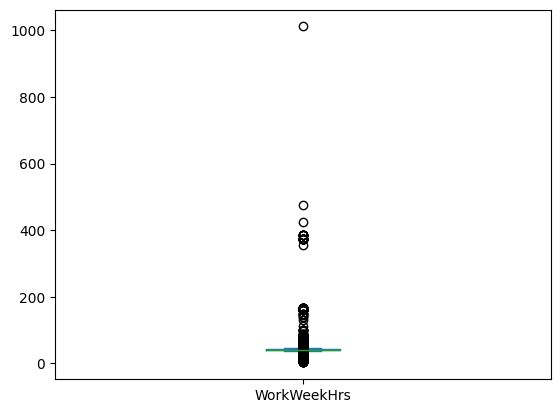

In [ ]:
#ploting box plot
Df['WorkWeekHrs'].plot(kind= 'box')
Df['WorkWeekHrs'].describe().loc[['min', '25%', '50%', '75%', 'max']]
# there is many outliers

In [ ]:
# inter_Quartile
Q3 = Df['WorkWeekHrs'].describe().loc['75%']
Q1 = Df['WorkWeekHrs'].describe().loc['25%']
inter_Quartile = Q3- Q1
inter_Quartile

3.0

In [ ]:

# upper bound / Upper fence = Q3 + 1.5*inter_Quartile
upper_bound = Q3 + 1.5*inter_Quartile
upper_bound


# # lower bound / lower fence = Q1 - 1.5*inter_Quartile

lower_bound  = Q1 - 1.5*inter_Quartile
lower_bound

35.5

In [ ]:
# total outliers
upper_outliers = (Df['ConvertedComp'] > upper_bound).sum()
lower_outliers = (Df['ConvertedComp'] < lower_bound).sum()
total_outliers = upper_outliers + lower_outliers
total_outliers

9702

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [ ]:
# your code goes here
Df.corr().loc['Age']

# but this looks better
Df.corr()



<ipython-input-22-912e23f0fd76>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr().loc['Age']
<ipython-input-22-912e23f0fd76>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Df.corr()


,Respondent,CompTotal,WorkWeekHrs,ConvertedComp,CodeRevHrs,Age,NormalizedAnnualCompensation
Respondent,1.000000,-0.013490,-0.015314,0.010878,0.004621,0.004041,0.000426
CompTotal,-0.013490,1.000000,0.003510,-0.063561,0.007063,0.006970,0.863228
WorkWeekHrs,-0.015314,0.003510,1.000000,0.034351,0.026517,0.036518,0.005523
ConvertedComp,0.010878,-0.063561,0.034351,1.000000,-0.088934,0.401821,-0.086286
CodeRevHrs,0.004621,0.007063,0.026517,-0.088934,1.000000,-0.020469,0.012747
Age,0.004041,0.006970,0.036518,0.401821,-0.020469,1.000000,-0.005238
NormalizedAnnualCompensation,0.000426,0.863228,0.005523,-0.086286,0.012747,-0.005238,1.000000


<Axes: >

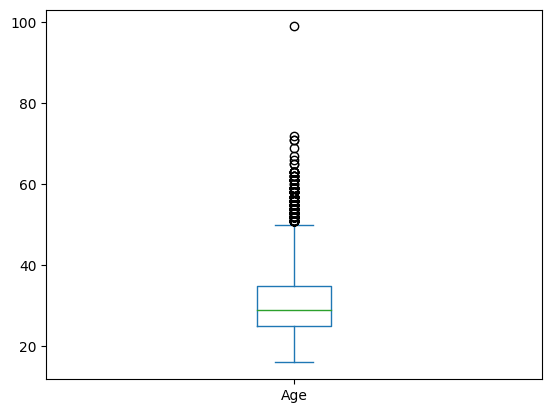

In [ ]:
# Based on the boxplot of ‘Age’ how many outliers do you see below Q1

Df['Age'].plot(kind = 'box')


In [ ]:
# exporting the final data
Df.to_csv("EDA file.csv", index = False)

from google.colab import drive
drive.mount('/content/drive')

dff = pd.read_csv('/content/drive/MyDrive/Business Analyst Projects/IBM - stack over flow survey project/week3(EDA)/EDA file.csv')
dff[['Respondent','Country','Student','EdLevel','UndergradMajor','EduOther','DevType','YearsCode','Age1stCode','YearsCodePro','CareerSat','JobSat
','LanguageWorkedWith','LanguageDesireNextYear','DatabaseWorkedWith','DatabaseDesireNextYear','PlatformWorkedWith','PlatformDesireNextYear','WebFrameWorkedWith', 'WebFrameDesireNextYear','']]

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase,NormalizedAnnualCompensation
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,61000.0
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,138000.0
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy,90000.0
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,348000.0
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy,90000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11393,25136,I am a developer by profession,Yes,Never,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Cour...,36.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Difficult,130000.0
11394,25137,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Poland,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Tech...,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult,74400.0
11395,25138,I am a developer by profession,Yes,Less than once per year,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Tech articles written by other developers;Indu...,34.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Too long,Easy,105000.0
11396,25141,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of LOWER quality than prop...",Employed full-time,Switzerland,No,"Secondary school (e.g. American high school, G...",NaN,...,NaN,25.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy,80000.0
